# AlexNet Attempt

## Data Loading

In [1]:
import os
import torch
from helper import *

In [2]:
data_dir = "dataset"
# remove ds_store file
if os.path.exists(data_dir + "/.DS_Store"):
    os.remove(data_dir + "/.DS_Store")
print(os.listdir(data_dir))

['cataract', 'glaucoma', 'diabetic_retinopathy', 'normal']


In [3]:
from os import walk
for (dirpath, dirnames, filenames) in walk(data_dir):
    print("Directory path: ", dirpath)
    print("Folder name: ", dirnames)
    #print("File name: ", filenames)

Directory path:  dataset
Folder name:  ['cataract', 'glaucoma', 'diabetic_retinopathy', 'normal']
Directory path:  dataset/cataract
Folder name:  []
Directory path:  dataset/glaucoma
Folder name:  []
Directory path:  dataset/diabetic_retinopathy
Folder name:  []
Directory path:  dataset/normal
Folder name:  []


Define transform

Set params

In [4]:
img_size = 227
BATCH_SIZE = 32

In [5]:
from torchvision import transforms

def transform(image_size: int):
    transform = transforms.Compose([
        transforms.Resize(image_size),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Standard AlexNet normalization
    ])
    return transform


In [6]:
from torchvision import datasets
dataset = datasets.ImageFolder(data_dir, transform=transform(img_size))
dataset.class_to_idx

{'cataract': 0, 'diabetic_retinopathy': 1, 'glaucoma': 2, 'normal': 3}

In [7]:
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [0.8, 0.2])

In [8]:
#dataloader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

<Axes: >

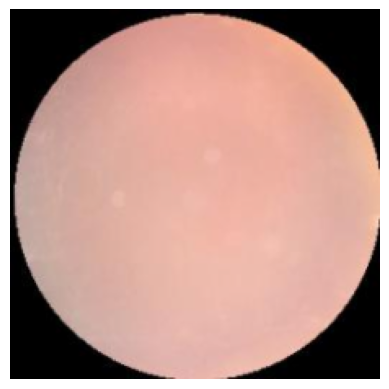

In [9]:
# Run this to test your data loader
images, labels = next(iter(train_loader))
# helper.imshow(images[0], normalize=False)
imshow(images[0])

## AlexNet Training

In [10]:
from heading import *

In [11]:
input_channels = 3
output_size = 4

In [12]:
Alex_net = AlexNet(input_channels, output_size)

In [13]:
alex_net = create_network(Alex_net)

In [14]:
EPOCH = 80
LR = 0.001
number_of_images = 2000

In [15]:
trained_alexnet_model = train_model(alex_net, train_loader, LR, EPOCH, number_of_images)

Epoch 1/80, Avg Loss: 1.3988, LR: 0.001000
Epoch 2/80, Avg Loss: 1.1984, LR: 0.001000


KeyboardInterrupt: 

In [ ]:
test_model(trained_alexnet_model, test_loader, number_of_images = 100)

Batch 1
Batch 2
Batch 3
Batch 4
Correct predictions: 64
Test accuracy: 0.6400


In [ ]:
from PIL import Image
from torchvision.transforms.functional import to_pil_image
import matplotlib.pyplot as plt

# Retrieve and display the first image from the dataset
first_image, _ = test_dataset[0]

select_image = first_image 
label_list = dataset.class_to_idx

# Uncomment to use predict_image
predict_image(trained_alexnet_model, select_image, label_list)



Predicted result(s): ['diabetic_retinopathy']
Confidence: tensor([0.7655], grad_fn=<IndexBackward0>)


In [ ]:
torch.save(trained_alexnet_model, 'AlexNet_model.pth')


## AlexNet Retraining

In [ ]:
pt_alexnet_model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
pt_alexnet_model.eval()



Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /Users/joshwells/.cache/torch/hub/v0.10.0.zip
/Users/joshwells/Documents/AIAT2/Ai-Assesment-2/venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/joshwells/Documents/AIAT2/Ai-Assesment-2/venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /Users/joshwells/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100.0%


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
pretrained_alexnet_model = torch.load('AlexNet_model.pth')

pre_trained_alexnet_model = train_model(pretrained_alexnet_model, train_loader, LR, EPOCH, number_of_images)

/var/folders/rx/ymq2vbpj12lbdklsg792lr6w0000gn/T/ipykernel_90713/377103270.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pretrained_alexnet_model = torch.load('AlexNet

Current Loss 8.967138081789017
Current Loss 8.961904346942902
Current Loss 8.320273041725159
Current Loss 8.106619030237198
Current Loss 7.328924179077148
Current Loss 7.723619073629379
Current Loss 8.437768697738647
Current Loss 6.873297572135925
Current Loss 8.246389657258987
Current Loss 7.607885539531708
Current Loss 6.87357759475708
Current Loss 7.593193799257278
Current Loss 7.66247221827507
Current Loss 7.128372490406036
Current Loss 7.541959524154663
Current Loss 6.653644844889641
Current Loss 7.040787369012833
Current Loss 8.151993572711945
Current Loss 6.044973641633987
Current Loss 5.6003798842430115


In [ ]:
test_model(pre_trained_alexnet_model, test_loader, number_of_images = 100)

#torch.save(pre_trained_alexnet_model, 'AlexNet_model1.pth')

Batch 1
Batch 2
Batch 3
Batch 4
Correct predictions: 83
Test accuracy: 0.8300


### Alexnet Retraining 2

In [ ]:
pt_alexnet_model = torchvision.models.alexnet(weights='IMAGENET1K_V1')

In [ ]:
num_features = pt_alexnet_model.fc.in_features

pt_alexnet_model.fc = nn.Linear(num_features, 4)

pt_alexnet_model = pt_alexnet_model.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(pt_alexnet_model.parameters(), lr=0.001, momentum=0.9)

#exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

AttributeError: 'AlexNet' object has no attribute 'fc'

In [ ]:
#model_ft = train_model(pt_alexnet_model, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

In [ ]:
re_trained_alexnet_model = train_model(pretrained_alexnet_model, train_loader, LR, EPOCH, number_of_images)

In [ ]:
test_model(re_trained_alexnet_model, test_loader, number_of_images = 10)